# Compare2.eps instruction

This file is to compare model with regime switching and model without regime switching. The model with regime switching is calculated by our pricing formula with two sets of parameters as per below(Regime_vs, discreet). The model without regime switching is calculated by equating regime one to regime two(Regime_vs2,discreet).The first set of parameters is corresponding to the 'good' economic status (State I) with higher interest rate, mean reverted rate and jump itensity. We call it 'good' because it will lead to a higer variance and consequetly, higher fair strike price. The second set of paramters is obtained by equating two regime status with the 'poor' economic status (State II). Two equivalent inputs will eliminate the effects of regime and our model will degerate to the SV model of Zhu and Lian without cosideration of regime switching. As a result, we can see from figure that with the coaction of two regimes status, the fair strike price will be increased.

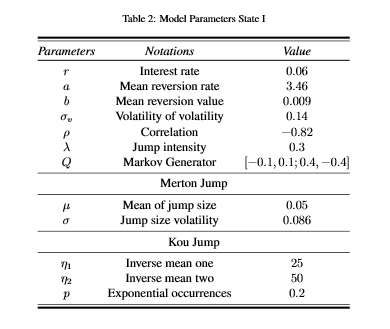

In [18]:
# Parameter of the 'good' economic status
from IPython.display import Image
Image("set1.png")

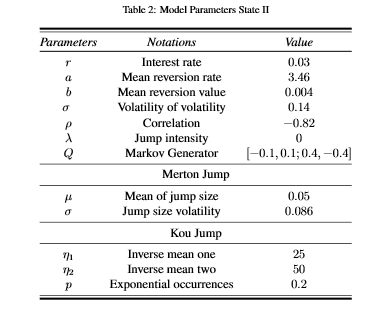

In [19]:
# parameters of 'poor' economic status. !!!Benchmark
from IPython.display import Image
Image("set2.png")

In [9]:
def Phi1(T,AF,Q,Delta,Stock1,Stock2,Regime,Jump1,Jump2): 
    
    ###############################################################################
    #                           PARAMETER INPUT                                   #
    ###############################################################################
    #Stock1 = Stock(100,0.087**2,AF,0.06,0.14,3.46,0.006704,T,-0.82)
    #Stock2 = Stock(100,0.087**2,AF,0.03,0.14,3.46,0.002852,T,-0.82)
    #Regime = Regime2(Q);
    #S0, y0, AF, r, sigma, a, b, N, rho, mu,sigma_J,lambda_
    #Jump1 = Jump_Merton(100,0.087**2,AF,0.06,0.14,3.46,0.006704,T,-0.82,0.05,0.086,0.)
    #Jump2 = Jump_Merton(100,0.087**2,AF,0.03,0.14,3.46,0.002852,T,-0.82,0.06,0.086,0.3)
    #####################################################################################
    # ###############################Numerical Integration########################
    n = 10 # time step of integration
    X = np.linspace(T-Delta,T,n+1)
    phi1_1_2j = [];phi1_1_1j = [];phi1_1_0j = [];
    phi1_2_2j = [];phi1_2_1j = [];phi1_2_0j = []; 
    
    for i in range(len(X)):
        x1 = Jump1.L(-2j,X[i]); x2=Jump1.L(-1j,X[i]);x3=Jump1.L(0,X[i]);
        phi1_1_2j.append(x1); phi1_1_1j.append(x2); phi1_1_0j.append(x3);
        y1 = Jump2.L(-2j,X[i]); y2=Jump2.L(-1j,X[i]);y3=Jump2.L(0,X[i]);
        phi1_2_2j.append(y1); phi1_2_1j.append(y2);phi1_2_0j.append(y3); 
        
        
    phI1_1_2j = np.trapz(phi1_1_2j,dx=Delta/n);phI1_2_2j = np.trapz(phi1_2_2j,dx=Delta/n);
    phI1_1_1j = np.trapz(phi1_1_1j,dx=Delta/n);phI1_2_1j = np.trapz(phi1_2_1j,dx=Delta/n);
    phI1_1_0j = np.trapz(phi1_1_0j,dx=Delta/n);phI1_2_0j = np.trapz(phi1_2_0j,dx=Delta/n);
  
    #################################Diagonal Matrix#########################################
    phi1_Matrix_2j = np.diag(np.array([phI1_1_2j,phI1_2_2j]));
    phi1_Matrix_1j = np.diag(np.array([phI1_1_1j,phI1_2_1j]));
    phi1_Matrix_0j = np.diag(np.array([phI1_1_0j,phI1_2_0j]));
    
    #######################Phi1_characteristic function#####################################
    Phi1_2j = Regime.character(phi1_Matrix_2j,T-Delta,T);
    Phi1_1j = Regime.character(phi1_Matrix_1j,T-Delta,T);
    Phi1_0j = Regime.character(phi1_Matrix_0j,T-Delta,T);
    return Phi1_2j, Phi1_1j, Phi1_0j

In [10]:
def Phi2(T,AF,Q,Delta,Stock1,Stock2,Regime):
    
    ###############################################################################
    #                           PARAMETER INPUT                                   #
    ###############################################################################
    #
    #Stock1 = Stock(100,0.087**2,AF,0.06,0.14,3.46,0.006704,T,-0.82)# S0, y0, AF, r, sigma, a, b, N, rho
    #Stock2 = Stock(100,0.087**2,AF,0.03,0.14,3.46,0.002852,T,-0.82)
    #Regime = Regime2(Q);
    #
    ###############################################################################
    
    n = 10 # time step of integration
    X = np.linspace(0,T-Delta,n+1)
    phi2_1_2j = [];phi2_2_2j = [];
    
    for i in range(len(X)):
        H1 = Stock1.H(X[i]);H2 = Stock2.H(X[i]);
        x = Stock1.a*Stock1.b*H1;y = Stock2.a*Stock2.b*H2;
        phi2_1_2j.append(x);phi2_2_2j.append(y);
        #print(H1,X[i],T-Delta)
        
    phI2_1_2j = np.trapz(phi2_1_2j,dx=(T-Delta)/n);phI2_2_2j = np.trapz(phi2_2_2j,dx=(T-Delta)/n);
    phi2_Matrix = np.diag(np.array([phI2_1_2j,phI2_2_2j]))
    Phi2 = Regime.character(phi2_Matrix,0,T-Delta)
    return Phi2,Stock1.H(0)

In [11]:
def regime_VS(AF):
    
    ###############################################################################
    #                           PARAMETER INPUT                                   #
    ###############################################################################
   
    Delta = 1/AF
    Q = np.array([[-0.1,0.1],[0.4,-0.4]])#transition matrix
    #Stock1 = Stock(100,0.087**2,252,0.06,0.14,3.46,0.006704,1,-0.82)# S0, y0, AF, r, sigma, a, b, T, rho
    #Stock2 = Stock(100,0.087**2,252,0.03,0.14,3.46,0.002852,1,-0.82)
    #S0, y0, AF, r, sigma, a, b, N, rho, mu,sigma_J,lambda_
    #Jump1 = Jump_Merton(100,0.087**2,252,0.06,0.14,3.46,0.006704,1,-0.82,0.05,0.086,0.)
    #Jump2 = Jump_Merton(100,0.087**2,252,0.03,0.14,3.46,0.002852,1,-0.82,0.06,0.086,0.3)
    Regime = Regime2(Q);
    ################################################################################
    
    U = np.array([0,0])#initialize
    T = 1
    for k in range(0,AF*T):
        t_k = (k+1)*Delta
        Stock1 = Stock(100,0.087**2,AF,0.06,0.14,3.46,0.006704,t_k,-0.82)# S0, y0, AF, r, sigma, a, b, T, rho
        Stock2 = Stock(100,0.087**2,AF,0.03,0.14,3.46,0.002852,t_k,-0.82)
        Jump1 = Jump_Merton(100,0.087**2,AF,0.06,0.14,3.46,0.006704,t_k,-0.82,0.05,0.086,0.3)
        Jump2 = Jump_Merton(100,0.087**2,AF,0.03,0.14,3.46,0.002852,t_k,-0.82,0.05,0.086,0.)
        R = np.diag([np.exp(Stock1.r*Delta),np.exp(Stock2.r*Delta)])# matrix of interest rate
        Phi1_2j,Phi1_1j,Phi1_0j = Phi1(t_k,AF,Q,Delta,Stock1,Stock2,Regime,Jump1,Jump2) 
        Phi2_,H1 = Phi2(t_k,AF,Q,Delta,Stock1,Stock2,Regime)
        if t_k == Delta:
            M = Stock1.M(-2j,0)
            uk = Phi1_2j[1]*np.exp(M*Stock1.y0)-2*Phi1_1j[1]+Phi1_0j[1]
            #Uk = np.matmul(R,uk)
            Uk = uk
        else:
            uk = np.multiply(Phi1_2j[1],Phi2_[1])*np.exp(H1*Stock1.y0)-2*Phi1_1j[1]+Phi1_0j[1]
            #Uk = np.matmul(R,uk)
            Uk = uk
            
        U = U+Uk
        
        
        
       
    K = (U/T)*10000
    return K

In [12]:
def discrete(AF):
    
    
    Kvar = []
    
    for t in AF:
        K = regime_VS(t)
        Kvar.append(K)
     
    return(Kvar)


In [13]:

def Continuous():
    
    ###############################################################################
    #                           PARAMETER INPUT                                   #
    ###############################################################################
    
    Stock1 = Stock(100,0.087**2,252,0.06,0.14,3.46,0.006704,1,-0.82)# S0, y0, AF, r, sigma, a, b, T, rho
    Stock2 = Stock(100,0.087**2,252,0.03,0.14,3.46,0.002852,1,-0.82)
    #S0, y0, AF, r, sigma, a, b, N, rho, mu,sigma_J,lambda_
    Jump1 = Jump_Merton(100,0.087**2,252,0.06,0.14,3.46,0.006704,1,-0.82,0.05,0.086,0.3)
    Jump2 = Jump_Merton(100,0.087**2,252,0.03,0.14,3.46,0.002852,1,-0.82,0.05,0.086,0.)
    Q = np.array([[-0.1,0.1],[0.4,-0.4]])
    Regime = Regime2(Q);T=1;


    n = 10 # time step of integration
    X = np.linspace(0,1,n+1)
    Phi_Matrix=[]
    E = np.ones(Q.ndim)                     
    for i in range(len(X)):
        v1 = Stock1.mean(X[i]);v2 = Stock2.mean(X[i])
        phi = np.diag(np.array([v1,v2]))
        pphi = np.matmul(linalg.expm(Q.transpose()*(X[i])),phi)
        Phi = np.matmul(E,pphi)
        Phi_Matrix.append(Phi)
        #print(Phi)
        
    
    a = list(zip(*Phi_Matrix))
    #print(a)
    V1 = np.trapz(a,dx=T/n);
    j1 = Jump1.mean_com(); j2 = Jump2.mean_com();
    V2 = np.diag(np.array([j1,j2]));
    J = np.matmul(linalg.expm(Q.transpose()*T),V2);
    Kvar = ((1-np.exp(-Stock1.a*T))/Stock1.a*T)*Stock1.y0+(Stock1.a/T)*V1+np.matmul(E,J);
    #print(Stock1.a*V1)


    return(Kvar*10000)

In [14]:
def regime_VS2(AF):
    
    ###############################################################################
    #                           PARAMETER INPUT                                   #
    ###############################################################################
   
    Delta = 1/AF
    Q = np.array([[-0.1,0.1],[0.4,-0.4]])#transition matrix
    #Stock1 = Stock(100,0.087**2,252,0.06,0.14,3.46,0.006704,1,-0.82)# S0, y0, AF, r, sigma, a, b, T, rho
    #Stock2 = Stock(100,0.087**2,252,0.03,0.14,3.46,0.002852,1,-0.82)
    #S0, y0, AF, r, sigma, a, b, N, rho, mu,sigma_J,lambda_
    #Jump1 = Jump_Merton(100,0.087**2,252,0.06,0.14,3.46,0.006704,1,-0.82,0.05,0.086,0.)
    #Jump2 = Jump_Merton(100,0.087**2,252,0.03,0.14,3.46,0.002852,1,-0.82,0.06,0.086,0.3)
    Regime = Regime2(Q);
    ################################################################################
    
    U = np.array([0,0])#initialize
    T = 1
    for k in range(0,AF*T):
        t_k = (k+1)*Delta
        Stock1 = Stock(100,0.087**2,AF,0.03,0.14,3.46,0.002852,t_k,-0.82)# S0, y0, AF, r, sigma, a, b, T, rho
        Stock2 = Stock1
        Jump1 = Jump_Merton(100,0.087**2,AF,0.03,0.14,3.46,0.002852,t_k,-0.82,0.05,0.086,0.)
        Jump2 = Jump1
        R = np.diag([np.exp(Stock1.r*Delta),np.exp(Stock2.r*Delta)])# matrix of interest rate
        Phi1_2j,Phi1_1j,Phi1_0j = Phi1(t_k,AF,Q,Delta,Stock1,Stock2,Regime,Jump1,Jump2) 
        Phi2_,H1 = Phi2(t_k,AF,Q,Delta,Stock1,Stock2,Regime)
        if t_k == Delta:
            M = Stock1.M(-2j,0)
            uk = Phi1_2j[1]*np.exp(M*Stock1.y0)-2*Phi1_1j[1]+Phi1_0j[1]
            #Uk = np.matmul(R,uk)
            Uk = uk
        else:
            uk = np.multiply(Phi1_2j[1],Phi2_[1])*np.exp(H1*Stock1.y0)-2*Phi1_1j[1]+Phi1_0j[1]
            #Uk = np.matmul(R,uk)
            Uk = uk
            
        U = U+Uk
        
        
        
       
    K = (U/T)*10000
    return K

In [15]:
def discrete2(AF):
    
    
    Kvar = []
    
    for t in AF:
        K = regime_VS2(t)
        Kvar.append(K)
     
    return(Kvar)

<Figure size 432x288 with 0 Axes>

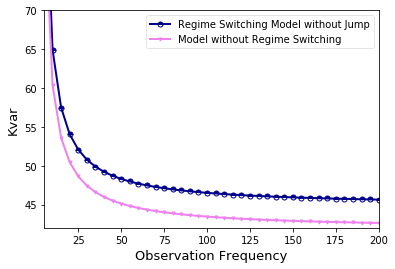

In [17]:
# final main()
from VS_class2 import Stock, Regime2, Jump_Merton, Jump_Kou
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import linalg

AF = range(5,251,5)
X = np.linspace(5,250,50)
# calculate discrete sols based AF
Kvar_d = discrete(AF)
K_d = list(zip(*Kvar_d))
# calculate discrete sols based AF, without regime switching
Kvar_d1 = discrete2(AF)
K_d1 = list(zip(*Kvar_d1))
# calculate continuous sols and copy to len(AF)
K = Continuous()
Kvar_c =  [K[:] for i in range(len(AF))]
K_c = list(zip(*Kvar_c))
# graph and compare discrete and continuous sols
fig = plt.figure()  # an empty figure with no axes

fig, ax = plt.subplots(1)
#ax.plot(X, K_d[0], color='darkblue', marker='o', fillstyle='top',\
 #       linestyle='solid', linewidth=1,ms=5,label='Model with Regime Switching')
#ax.plot(X, K_c[0], color='green',label='Continuous Kvar without jump')
ax.plot(X, K_d[1], color='darkblue', marker='o', fillstyle='top',linestyle='solid', \
        linewidth=2,ms=5,label='Regime Switching Model without Jump')
#ax.plot(X, K_c[0], color='green',label='Continuous Kvar without jump')
ax.plot(X, K_d1[1], color='violet', marker='v', fillstyle='top',linestyle='solid', \
       linewidth=2,ms=3,label='Jump diffusion model without Regime Switching')
#ax.plot(X, K_c[1], color='cyan',label='Continuous Kvar without jump')
ax.set_xlim(5, 200)
ax.set_ylim(42, 70)
plt.xlabel('Observation Frequency',fontsize=13)
plt.ylabel('Kvar',fontsize=13)
ax.legend(fancybox=True, framealpha=0.5)

#plt.title("Simple Plot")

plt.savefig('Compare2.pdf', format='pdf', dpi=1000)
# Outfile=open('Kvar1.txt','a+')
# Outfile.write(str(K_d1[0]))
# Outfile.close()

Outfile=open('Kvar_new.txt','a+')
Outfile.write(str(K_d))
Outfile.close()

Outfile=open('Kvar_c.txt','a+')
Outfile.write(str(K_c))
Outfile.close()